https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html  
Report python notebook file with random number generation codes for normal distribution and uniform distribution.<br> 
ジュピターで乱数生成コードを用いて正規分布と一様分布に関してレポートする <br>
Also report codes for shuffling and permutation. <br>
シャッフルや順列に関しても同様にレポートする

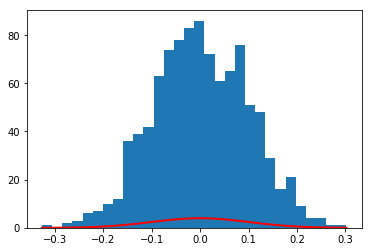

In [11]:
import numpy as np
import matplotlib.pyplot as plt
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)# numpyのrandomで正規分布から
count, bins, ignored = plt.hist(s, 30)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

[参考] <br>
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html  
https://qiita.com/r-de-r/items/d51bf2f4941c1934eeae

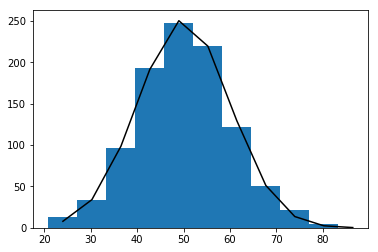

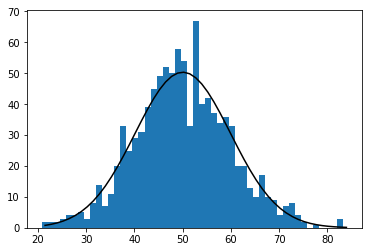

In [10]:
import scipy as sp
def hist(x, Bins = None): # ヒストグラムを出力
    from scipy.stats import norm
    if Bins is None:
        Bins = int(1+sp.log(len(x))/sp.log(2))
    a = plt.hist(x, bins=Bins)
    xAxis = list(a[1])
    width = a[1][1]-a[1][0]
    xAxis = xAxis+width/2
    mean = sp.mean(x)
    sd = sp.std(x)
    yAxis2 = norm.pdf(xAxis, loc=mean, scale=sd)*width*N
    plt.plot(xAxis, yAxis2, color='black')
    plt.show()
Mean = 50
SD = 10
N = 1000
# 平均 Mean, 標準偏差 SD の正規乱数を N 件生成
x = sp.random.normal(Mean, SD, N)
hist(x)
hist(x, Bins=50)

以下、
https://qiita.com/kenmatsu4/items/c1a64cf69bc8c9e07aa2
を参考に

In [12]:
import numpy as np
import numpy.random as rd
import scipy.stats as st
import matplotlib.pyplot as plt

## rand(d0, d1, ..., dn)

まずは[0, 1)の一様分布を生成。  
引数に生成乱数の次元の要素数を指定できる。  
下記例では2行3列となる。  
引数がない場合は1つの乱数を生成。

In [14]:
x = rd.rand(2, 3)
print (x)

[[0.96463558 0.64434272 0.19189853]
 [0.06139472 0.85125178 0.42119258]]


## randn(d0, d1, ..., dn)
平均0, 標準偏差1の正規分布から生成される乱数を生成。  
引数に生成乱数の次元の要素数を指定できる。  
例では2行4列となる。引数がない場合は1つの乱数を生成。
平均、標準偏差を指定したい場合は
$ sigma * rd.randn() + mu $
のように書く。

In [16]:
x1 = rd.randn(2, 4)
print (x1)

x2 = 2.5 * rd.randn(3, 3) + 3
print (x2)

[[-1.2841533  -0.79940629  1.11868942  0.8158331 ]
 [ 0.83962276 -0.47157035  1.21954392  0.56325689]]
[[-0.06881254  0.79580974  2.47907413]
 [ 1.70251364  2.30975615  3.50851535]
 [ 3.28897702 -2.73250435  4.27139718]]


## randint(low, high=None, size=None)

引数で指定した範囲の離散一様分布から生成される整数の乱数を生成する。  
high, sizeは省略可。highが省略されない場合は[0, low)、highが記載された場合は[low, high)の範囲が設定され、共に上限の値は含まないことに注意。  
とある配列からランダムに要素を幾つか取り出したいときなどに有用。

In [18]:
#0-5未満で１０個取り出す
x = rd.randint(low=0, high=5, size=10)
print (x)
#xのリストに相当するlabelを記載する
li = np.array([u"数学", u"理科", u"社会", u"国語", u"英語"])
for l in li[x]:
    print (l)

[4 4 0 0 3 4 2 2 2 4]
英語
英語
数学
数学
国語
英語
社会
社会
社会
英語


## random_integers(low, high=None, size=None)
randint()同様、引数で指定した範囲の離散一様分布から生成される整数の乱数を生成する。high, sizeは省略可。  
主な違いは範囲にあり、
   - highが省略されない場合は[1, low]、
   - highが記載された場合は[low, high]の範囲が設定され、「上限を含む」ということとlowのみ指定の場合の加減が"1"となるところ。

In [19]:
x = rd.random_integers(low=1, high=10, size=(2,5))
print (x)

dice = rd.random_integers(1, 6, 100) # サイコロを100回振るシミュレーション
print (dice)

[[1 5 3 8 6]
 [9 3 4 7 7]]
[1 4 3 5 5 6 2 2 2 1 3 1 4 6 4 6 6 3 4 4 5 4 2 1 5 4 5 6 2 2 2 4 5 3 6 4 5
 6 4 2 4 4 2 1 2 6 1 1 4 5 2 4 3 6 1 3 4 4 6 1 4 5 1 1 4 1 4 3 1 1 4 6 1 2
 2 5 3 2 1 3 3 1 2 4 6 3 3 4 1 2 2 1 5 2 1 1 1 4 6 1]


/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  """Entry point for launching an IPython kernel.
/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  after removing the cwd from sys.path.


## random_sample(size=None), random(size=None), ranf(size=None), sample(size=None)

- random_sample(size=None)
- random(size=None)
- ranf(size=None)
- sample(size=None)  
は全て同じ機能。  

rand()との違いは引数の指定の仕方がこれらはタプルで指定ですが、rand()は引数自体が複数ある、という指定の仕方になります。

In [20]:
x = np.random.random_sample((4,3))
print (x)

[[0.42967706 0.7780103  0.7773365 ]
 [0.95450031 0.29589912 0.24728531]
 [0.21084234 0.5657741  0.43984989]
 [0.84589621 0.65642942 0.76332505]]


## choice(a, size=None, replace=True, p=None)

choiceの引数の構造はchoice(a, size=None, replace=True, p=None)です。  
- aはrange(a)からの乱数選択を表します。
- sizeで指定された数の乱数を生成します。
- replaceが特徴的ですが、range(a)からサンプリングしたとみなされるのですが、Trueを指定すると取り出した数字を戻さない形で乱数生成されます。同じものが２回でないです。なのでaの数値がsizeより小さいとエラーになります。
- pも特徴的ですが、一様乱数ではなく、各数字の生起確率を指定できます。なので、aとpのサイズを同じにしないとエラーになります。

今までの他の乱数はpython標準のlistで返しますが、これはnumpyのndarrayで戻り値を返します。

In [24]:
x1=rd.choice(5, 5, replace=False )     # 0-4の並べ替えと同等
print (x1)

x2=rd.choice(5, 5, p=[0.1,0.1,0.1,0.1,0.6]) # 4が出る確率が高い
print (x2)

[2 3 4 0 1]
[0 4 4 4 4]


## shuffle

配列の順番をランダムにシャッフルする関数。  
戻り値で返すのではなく、引数に与えられた配列自体を変更することに注意。

In [34]:
#機能しなかったため、https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.shuffle.html#numpy.random.shuffleを参照
arr = np.arange(10)
print (arr)
np.random.shuffle(arr)
arr

[0 1 2 3 4 5 6 7 8 9]


array([3, 7, 8, 0, 5, 9, 4, 2, 6, 1])

## permutation
引数にint型変数を指定すると、内部的にrange(a)を生成しそれをランダムに並び替える。  
引数にlistを指定するとその要素をランダムに並び替える。listの中の値は数値でなく、文字列等のlistでも可。

In [29]:
x1 = rd.permutation(10)
print (x1)

li = ['cat', 'dog', 'tiger', 'lion', 'elephant']
x2 = rd.permutation(li)
print (x2)

[5 1 8 2 7 4 3 6 0 9]
['dog' 'tiger' 'cat' 'lion' 'elephant']


## uniform(low=0.0, high=1.0, size=None)

一様分布から生成される乱数を生成。  
今まで説明した一様分布系の乱数生成関数と違うところは範囲を指定できるところ。  
引数構造は(low=0.0, high=1.0, size=None)で、[low, high)のように上が空いている半開区間。

# 確率分布モデル系乱数

## binomial(n, p, size=None) : 二項分布
成功確率pの試行をn回行った場合の二項分布から生成される乱数を生成する。  
下記は確率0.5コイントスを30回行ってその回数をメモする、ということを3000回行った時のヒストグラムと考えることができる。

[3 6 5 6 5 7 5 4 8 2 3 3 7 3 7 6 3 5 8 4]


(array([  8.,  21.,  48.,  90., 162., 231., 319., 392., 462., 416., 310.,
        255., 147.,  82.,  30.,  20.,   7.]),
 array([ 6.        ,  7.05882353,  8.11764706,  9.17647059, 10.23529412,
        11.29411765, 12.35294118, 13.41176471, 14.47058824, 15.52941176,
        16.58823529, 17.64705882, 18.70588235, 19.76470588, 20.82352941,
        21.88235294, 22.94117647, 24.        ]),
 <a list of 17 Patch objects>)

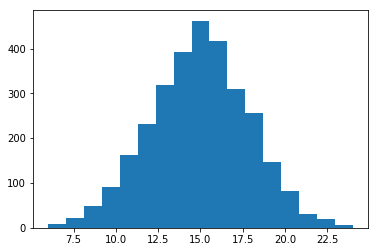

In [35]:
x = rd.binomial(10, 0.5, 20)
print (x)
x = rd.binomial(30, 0.5, 3000)
plt.hist(x, 17)

## poisson(lam=1.0, size=None) : ポアソン分布
単位時間当たりlam回発生する、というポワソン分布から乱数を生成する。  
とある広告のクリック率を例にとると、その広告が1時間に30回クリックされる、というようなケースに適用。  
下記は1時間当たり平均5回クリックされる広告の試行を1000回行った時(=1000時間分のデータをとった)のヒストグラムの考えることができる。

[27 30 26 21 33 35 34 35 25 22 34 27 44 24 25 22 34 40 25 24]


(array([ 49.,  93., 140., 183., 146., 166., 102.,  58.,  35.,  16.,   8.,
          2.,   0.,   2.]),
 array([ 0.        ,  1.07142857,  2.14285714,  3.21428571,  4.28571429,
         5.35714286,  6.42857143,  7.5       ,  8.57142857,  9.64285714,
        10.71428571, 11.78571429, 12.85714286, 13.92857143, 15.        ]),
 <a list of 14 Patch objects>)

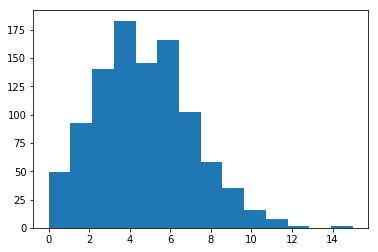

In [37]:
x = rd.poisson(30, 20)
print (x)
x = rd.poisson(5, 1000)
plt.hist(x, 14)

## hypergeometric(ngood, nbad, nsample, size=None) : 超幾何分布
超幾何分布から生成される乱数を生成する。例えばngood個の良品とnbad個の不良品があって、そこからnsamp個を不良率調査で抜き出した時に取り出せた良品の個数を返す。  
下記のグラフは、200個の製品が入っている集合箱に190個の良品、10個の不良品（つまり不良率5%）という状態だった時に、20個サンプリングして得られた良品の数をメモして、それを3000個の集合箱（全く同じ良品・不良品の数が入っている）に対して行った時のデータをヒストグラムにしたもの、と考えることができる。

[10  9  7 10 10  8  8  9  9  8  9  9  9  9 10  8 10  8 10  9  9  9  9  9
 10  8 10 10  9  9 10 10  8  7  9  8 10 10 10  9  9  9  9  8 10  9 10 10
  8 10 10  9  9  9 10  9  8  9  9 10  9  9 10  9 10 10  8  8  9 10  8  9
  9  7  8 10  9  9 10 10  8  8  9  9  9  7 10  9 10  9  9 10 10 10 10  9
 10 10  9  7]
9.09


(array([   8.,   19.,  171.,  596., 1179., 1027.]),
 array([15.        , 15.83333333, 16.66666667, 17.5       , 18.33333333,
        19.16666667, 20.        ]),
 <a list of 6 Patch objects>)

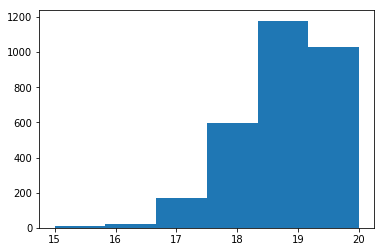

In [38]:
ngood, nbad, nsamp = 90, 10, 10
x = rd.hypergeometric(ngood, nbad, nsamp, 100)
print (x)
print (np.average(x))
ngood, nbad, nsamp = 190, 10, 20
x = rd.hypergeometric(ngood, nbad, nsamp, 3000)
plt.hist(x, 6)

## geometric(p, size=None) : 幾何分布
幾何分布から生成される乱数を生成する。成功確率pの試行を成功するまで繰り返し実施した時に何回めで成功が出るか、という回数の乱数を返す。  
下記のグラフは、成功確率1%の試行を成功するまで繰り返し、成功までの回数をメモする。それを1000回繰り返した時のデータをヒストグラムにしたもの、と考えられる。

[ 14  21  69 292  39  37  50  47 287   4 546  92 276 124 175 152  73   1
 215 361  31  33   3 137  47  52 293   9 252  27 287  21  39  58  17  10
 124 404  10  93  73 412  19  74  49  27 425 100 158  49 226  34 177 150
 110 165   9  45 166 125 124  73  35  22  17  34 107 815  92   4   2 191
 103  34   5  34   9  22   5 173  68  28  12   6  77  66  21  75 191 237
 121  31  12  27  89  50  13   8   1  30]


(array([248., 196., 158.,  96.,  76.,  65.,  36.,  29.,  24.,  19.,  17.,
          6.,   6.,   7.,   4.,   5.,   2.,   3.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.        ,  30.93333333,  60.86666667,  90.8       ,
        120.73333333, 150.66666667, 180.6       , 210.53333333,
        240.46666667, 270.4       , 300.33333333, 330.26666667,
        360.2       , 390.13333333, 420.06666667, 450.        ,
        479.93333333, 509.86666667, 539.8       , 569.73333333,
        599.66666667, 629.6       , 659.53333333, 689.46666667,
        719.4       , 749.33333333, 779.26666667, 809.2       ,
        839.13333333, 869.06666667, 899.        ]),
 <a list of 30 Patch objects>)

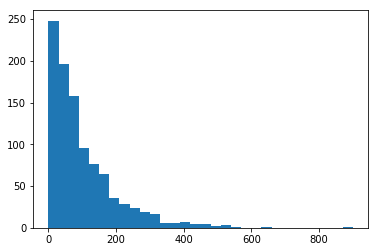

In [39]:
x = rd.geometric(p=0.01, size=100)
print (x)
x = rd.geometric(p=0.01, size=1000)
plt.hist(x, 30)

## normal(loc=0.0, scale=1.0, size=None) : 正規分布
いわずもしれた確率分布の王道、正規分布から生成される乱数を生成します。locが平均、scaleが標準偏差を表します。
下記はそのヒストグラムです。

[7.21090824 6.51738699 2.85352278 5.91440364 6.38419453 5.67972764
 6.16783268 4.83257946 5.96023838 4.71133352 4.32911552 4.86877009
 3.9050199  8.48531802 5.92131839 4.14247476 1.44060462 5.32759629
 7.9806295  2.74118335]


(array([3.000e+00, 4.000e+00, 1.500e+01, 5.300e+01, 1.640e+02, 3.460e+02,
        6.800e+02, 1.061e+03, 1.397e+03, 1.574e+03, 1.507e+03, 1.282e+03,
        8.930e+02, 5.650e+02, 2.860e+02, 1.040e+02, 5.500e+01, 9.000e+00,
        1.000e+00, 1.000e+00]),
 array([-2.98008037, -2.1683228 , -1.35656524, -0.54480767,  0.2669499 ,
         1.07870746,  1.89046503,  2.7022226 ,  3.51398017,  4.32573773,
         5.1374953 ,  5.94925287,  6.76101043,  7.572768  ,  8.38452557,
         9.19628314, 10.0080407 , 10.81979827, 11.63155584, 12.4433134 ,
        13.25507097]),
 <a list of 20 Patch objects>)

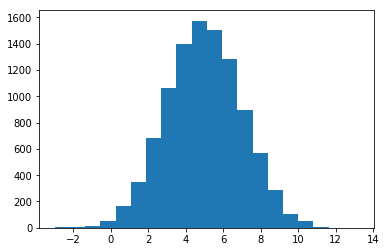

In [40]:
x = np.random.normal(5, 2, 20)
print (x)
x = np.random.normal(5, 2, 10000)
plt.hist(x,20)

ちなみに、この次に紹介するカイ二乗分布から生成される乱数というのはこの正規分布から生成される乱数の組み合わせと２乗するという操作から作ることができます。

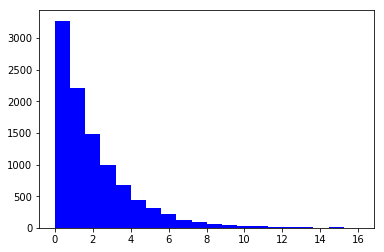

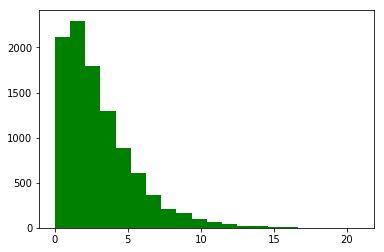

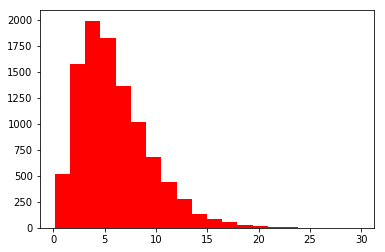

In [41]:
# 平均0, 標準偏差1の正規分布から生成される乱数を生成し、その値を2乗する
x1 = np.random.normal(0, 1, 10000)**2
x2 = np.random.normal(0, 1, 10000)**2
x3 = np.random.normal(0, 1, 10000)**2
x4 = np.random.normal(0, 1, 10000)**2
x5 = np.random.normal(0, 1, 10000)**2
x6 = np.random.normal(0, 1, 10000)**2

# その2乗した正規分布から生成された乱数を2つ足し合わせると自由度1のカイ二乗分布になる（青いグラフ）
plt.hist(x1+x2,20, color='b')
plt.show()
# また3つ足すと自由度2のカイ二乗分布（緑のグラフ）
plt.hist(x1+x2+x3,20, color='g')
plt.show()
# さらに6つ足すと自由度5のカイ二乗分布（赤いグラフ）
plt.hist(x1+x2+x3+x4+x5+x6,20, color='r')
plt.show()

## chisquare(df, size=None) : カイ二乗分布
自由度dfのカイ二乗分布から生成される乱数を返します。  
一つ上の項でも触れたように、カイ二乗分布は標準正規分布から生成される乱数を２乗し、足し合わせたものが従う分布です。

[ 4.69987633  2.36761918  0.61468551  0.24891018  0.94789592  1.58601198
 11.89437094  0.2107926   2.45690167  1.66829662  1.70534654  7.2560136
  2.9222085   3.95069323  1.80441058  2.03005963  1.33931248  1.90175561
  3.35788166  1.94722305]


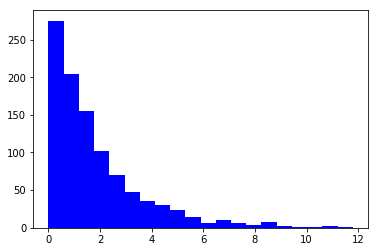

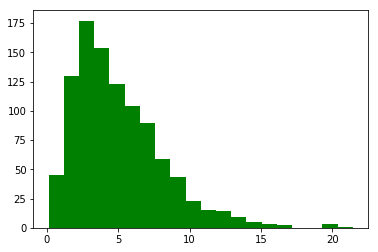

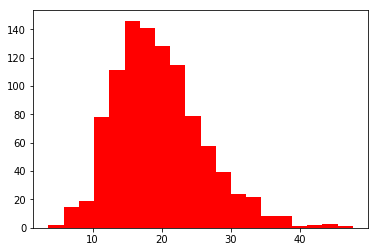

In [42]:
x = rd.chisquare(3, 20)
print (x)
# 自由度2, 5, 20に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2,5,20], "bgr"):
    x = rd.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.show()

## f(dfnum, dfden, size=None) : F分布
２つの自由度dfnumとdfdenをもつF分布から生成される乱数を返します。このF分布は独立した２つのカイ二乗分布に従う確率変数を分子、分母に持つ（それぞれ自由度で割ったもの）からなる確率分布です。カイ二乗分布は正規化して２乗しているという意味で分散と見なせるので２つの分散が同じであることの検定に用いられます。  
下記のグラフはそれぞれ自由度(1,4), (5,7), (10,10), (40,50)をもつF分布から生成された乱数をヒストグラムにしたものです。

[0.42964544 0.8439171  0.73158486 1.33011603 0.88556186 1.61604324
 1.12642833 0.48463848 0.56850671 0.47725653 0.64883495 0.88604848
 3.3580588  1.0318794  0.73012099 0.83115075 1.43456713 1.30222538
 2.0467345  0.4886189  1.68567933 1.49495189 0.84577459 2.77463746
 0.2245407  1.42323435 0.31334726 1.01156737 0.79263683 0.46275302]


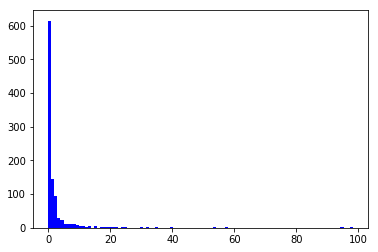

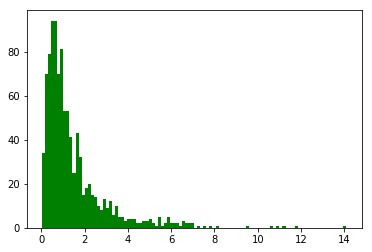

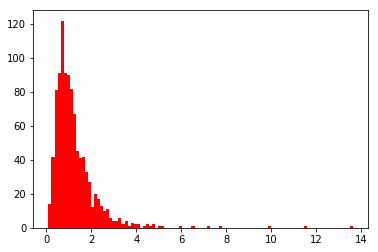

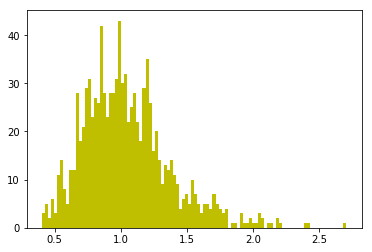

In [43]:
x = rd.f(6, 28, 30)
print (x)
for df, c in zip([(1,4), (5,7), (10,10), (40,50)], "bgry"):
    x = rd.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.show()

## exponential(scale=1.0, size=None) : 指数分布
パラメータlamを持つ指数分布から生成される乱数を返す。lamは単位時間に発生する平均回数を示すパラメータ。exponentialに設定するときはlamの逆数をscaleに設定する。  
exponentialは、単位時間に平均lam回起こる事象があるときに、次それが発生するまで何単位時間かかったかを表す乱数を返す。  
つまり、1分に平均0.1回起きるような事象があった場合、3と出た場合は3分後にそれが起こったことを表してる。  
下記のグラフはlam=0.1のときに指数分布から生成される乱数をヒストグラムで表したもの。

[ 1.69694966  6.90938382  4.50492059 17.74437276  2.22389727  4.52906424
 10.61820475  4.47261079 12.71920998 17.4148455   5.36664738  9.45503066
 13.99393666  9.36154683  1.88755456  3.7470646   6.52633074 34.30093846
  7.99547226  6.27473357]


(array([1.137e+03, 1.038e+03, 8.780e+02, 7.440e+02, 6.690e+02, 6.320e+02,
        5.360e+02, 5.250e+02, 4.130e+02, 3.870e+02, 3.220e+02, 3.050e+02,
        2.720e+02, 2.070e+02, 2.470e+02, 1.780e+02, 1.630e+02, 1.550e+02,
        1.280e+02, 1.280e+02, 9.500e+01, 9.000e+01, 7.800e+01, 7.000e+01,
        7.400e+01, 5.600e+01, 4.600e+01, 4.100e+01, 4.100e+01, 4.500e+01,
        3.600e+01, 2.200e+01, 2.800e+01, 1.800e+01, 2.200e+01, 2.300e+01,
        1.400e+01, 1.600e+01, 1.200e+01, 8.000e+00, 8.000e+00, 1.100e+01,
        1.400e+01, 1.000e+01, 5.000e+00, 5.000e+00, 6.000e+00, 6.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

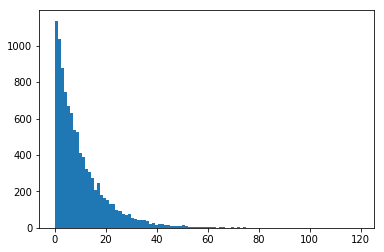

In [44]:
lam = 0.1   # 1分あたり0.1回発生する。
x = rd.exponential(1./lam, size=20)
print (x)
lam = 0.1  # 1分あたり0.1回発生する。
x = rd.exponential(1./lam, size=10000)
plt.hist(x, 100)